# UMAP
Uniform Manifold Approximation and Projection (UMAP) is a dimension reduction technique that can be used for visualisation similarly to t-SNE, but also for general non-linear dimension reduction. The algorithm is founded on three assumptions about the data:

The data is uniformly distributed on a Riemannian manifold;
The Riemannian metric is locally constant (or can be approximated as such);
The manifold is locally connected.

From these assumptions it is possible to model the manifold with a fuzzy topological structure. The embedding is found by searching for a low dimensional projection of the data that has the closest possible equivalent fuzzy topological structure.

The details for the underlying mathematics can be found in the publication:
McInnes, L, Healy, J, [UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction](https://arxiv.org/abs/1802.03426), ArXiv e-prints 1802.03426, 2018

The important thing is that you don’t need to worry about that—you can use UMAP right now for dimension reduction and visualisation as easily as a drop in replacement for scikit-learn’s t-SNE.

Documentation is available via Read the Docs.

https://pypi.org/project/umap-learn/

In [ ]:
pip install umap-learn

     |████████████████████████████████| 80 kB 3.2 MB/s 
     |████████████████████████████████| 1.1 MB 9.2 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76564 sha256=37a771024ecf7d1d4d80deacc460ab1243d650ab60a48dab487570180aa14a78
  Stored in directory: /root/.cache/pip/wheels/01/e7/bb/347dc0e510803d7116a13d592b10cc68262da56a8eec4dd72f
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=1f9865878b6bc3d4232aade269e180a38cdfd685a7ab07ff33a9916979c5a44c
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [ ]:
import pandas as pd
import os, umap

df = df = pd.read_csv('https://reneshbedre.github.io/assets/posts/tsne/ath_root_sub_seurat_processes.csv')
df = df.set_index(df.columns[0])
dft = df.T
dft = dft.set_index(dft.columns[0])

# check data
dft.describe()

gene,RPP1A,HTR12,AT1G01453,ADF10,PLIM2B,SBTI1.1,GL22,GPAT2,AT1G02570,BXL2,IMPA6,CSLD5,RPL19A,BGLU11,AT1G02870,RALF1,GSTF7,GSTF6,AT1G03010,AT1G03070,ATRRP4,BSU1,TPX2,SOM,AT1G03820,GRXS13,FLA9,AT1G03920,BARD1,AT1G04040,IAA3,RPS15A,AT1G04280,RPL23C,YUC3,PRMT10,ACO4,PER3,UGT75B1,UGT74E2,...,AT5G62440,HIPL2,ARR6,DOF5.6,BT1.1,FLS3,FLS5,SRK2H,PDF2.5,AAP4,PER69,RPS28C,ANAC104,BXL4,C/VIF2,AT5G64670,AT5G64680,AT5G64690,PEP3,TPPJ,HTR2.4,AT5G65380,AT5G65530,BHLH93,ATMYB68,ACS5,AT5G66230,NAC105,PER72,RAB18,AT5G66440,AT5G66580,AT5G66590,AT5G66800,AT5G66815,AT5G66860,AT5G66985,IRX14H,PER73,RPL26B
count,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,...,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000
mean,0.000272,-0.001764,-0.001387,-0.000926,0.000935,-0.007767,-0.023974,-0.003171,-0.004181,0.002394,-0.005456,-0.023343,0.000334,0.003039,-0.003622,-0.003159,-0.017528,-0.000878,-0.002683,-0.003096,-0.003286,-0.014124,-0.011557,-0.000070,0.003541,0.001300,-0.000635,0.002796,0.001030,0.000145,-0.002145,0.001146,-0.002501,0.000679,-0.007061,-0.001886,-0.004832,0.000170,0.002951,-0.000061,...,-0.001085,-0.001266,-0.001541,-0.018445,-0.000238,0.002869,0.003359,0.000797,0.003495,-0.006151,-0.000645,-0.001734,-0.003552,0.001187,-0.001015,-0.000971,-0.000826,0.001605,0.002705,-0.000397,0.000379,-0.001493,-0.000070,-0.001743,0.003030,-0.006350,-0.020020,0.001684,-0.001648,-0.002739,0.001291,0.002585,0.000681,-0.002780,0.001884,0.003225,-0.002610,-0.005347,-0.000209,0.000057
std,0.999556,1.000423,1.000467,1.000661,0.999498,0.903372,0.605490,0.995817,1.001283,0.998960,0.967749,0.623968,0.999590,0.987687,1.001788,1.001592,0.520169,0.963863,0.984587,0.981159,0.998671,0.646167,0.631611,1.000063,0.997417,0.999005,1.000645,0.982780,0.977973,0.999893,0.983346,0.998731,1.001328,0.999301,0.847055,1.000772,0.987229,0.999903,0.998423,1.000087,...,1.000541,1.000399,1.000687,0.698886,1.000117,0.998865,0.998496,0.999645,0.998917,0.868134,1.000492,1.001504,0.900445,0.999473,0.999557,1.000464,1.000433,0.999461,0.997331,1.000232,0.999781,1.000756,0.996758,1.001137,0.998956,0.937352,0.561311,0.992357,1.000400,1.001394,0.999413,0.998525,0.999173,1.001197,0.996303,0.998597,0.955916,0.964494,1.000016,0.999934
min,-1.270000,-0.260000,-0.280000,-0.600000,-0.510000,-0.130000,-0.070000,-0.290000,-0.310000,-0.230000,-0.310000,-0.070000,-1.520000,-0.240000,-0.490000,-0.520000,-0.050000,-0.210000,-0.190000,-0.340000,-0.270000,-0.060000,-0.060000,-0.440000,-0.220000,-0.770000,-0.990000,-0.170000,-0.180000,-1.120000,-0.250000,-1.100000,-0.490000,-1.030000,-0.150000,-0.390000,-0.290000,-0.570000,-0.390000,-0.580000,...,-0.470000,-0.320000,-0.470000,-0.080000,-0.620000,-0.260000,-0.460000,-0.550000,-0.300000,-0.120000,-0.690000,-0.870000,-0.140000,-0.440000,-0.360000,-0.590000,-0.450000,-0.330000,-0.340000,-0.520000,-0.530000,-0.520000,-0.260000,-0.660000,-0.340000,-0.160000,-0.060000,-0.210000,-0.250000,-0.520000,-0.480000,-0.550000,-0.410000,-0.430000,-0.240000,-0.430000,-0.240000,-0.180000,-0.490000,-0.680000
25%,-0.770000,-0.260000,-0.280000,-0.600000,-0.510000,-0.130000,-0.070000,-0.290000,-0.310000,-0.230000,-0.310000,-0.070000,-0

There are a number of parameters that can be set for the UMAP class; the major ones are as follows:

**n_neighbors:** This determines the number of neighboring points used in local approximations of manifold structure. Larger values will result in more global structure being preserved at the loss of detailed local structure. In general this parameter should often be in the range 5 to 50, with a choice of 10 to 15 being a sensible default.

**min_dist:** This controls how tightly the embedding is allowed compress points together. Larger values ensure embedded points are more evenly distributed, while smaller values allow the algorithm to optimise more accurately with regard to local structure. Sensible values are in the range 0.001 to 0.5, with 0.1 being a reasonable default.

**metric:** This determines the choice of metric used to measure distance in the input space. A wide variety of metrics are already coded, and a user defined function can be passed as long as it has been JITd by numba.

In [ ]:
# Define UMAP
brain_umap = umap.UMAP(random_state=999, n_neighbors=10, min_dist=.20)
# Fit UMAP and extract latent vars 1-2
embedding = pd.DataFrame(brain_umap.fit_transform(dft), columns = ['UMAP1','UMAP2'])

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
from sklearn.cluster import DBSCAN
# here eps parameter is very important and optimizing eps is essential
# for well defined clusters. I have run DBSCAN with several eps values
# and got good clusters with eps=3
dbscan_m = DBSCAN(eps=1, min_samples=10).fit(embedding)


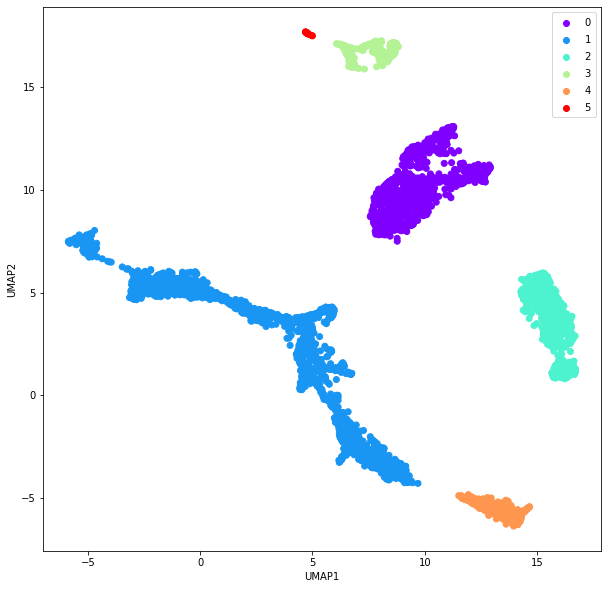

In [ ]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 10))

#Plot scatterplot for K-means Clustering
scatter = plt.scatter(embedding['UMAP1'],embedding['UMAP2'], c = dbscan_m.labels_, cmap ='rainbow')
plt.xlabel('UMAP1') 
plt.ylabel('UMAP2')
plt.legend(*scatter.legend_elements())

Now we can modify parameters to get better clustering results for DB scan or try to find a better representation of data

No handles with labels found to put in legend.


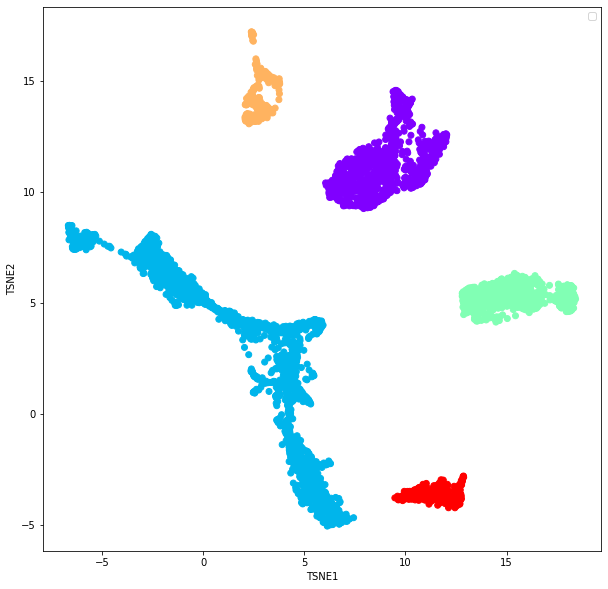

In [ ]:
# Define UMAP
#(random_state=999, n_neighbors=10, min_dist=.20)
brain_umap = umap.UMAP(random_state=999, n_neighbors=10, min_dist=.25)
# Fit UMAP and extract latent vars 1-2
embedding = pd.DataFrame(brain_umap.fit_transform(dft), columns = ['UMAP1','UMAP2'])

#Previously we used: dbscan_m = DBSCAN(eps=1, min_samples=10).fit(embedding)
#key settings are: epsilon (eps) and min_samples
dbscan_m = DBSCAN(eps=2, min_samples=10).fit(embedding)

import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 10))

#Plot scatterplot for K-means Clustering
scatter = plt.scatter(embedding['UMAP1'],embedding['UMAP2'], c = dbscan_m.labels_, cmap ='rainbow')
plt.xlabel('TSNE1') 
plt.ylabel('TSNE2')
plt.legend()

In [ ]:
pip install umap-learn[plot]

     |████████████████████████████████| 15.8 MB 627 bytes/s 
     |████████████████████████████████| 76 kB 4.2 MB/s 
     |████████████████████████████████| 791 kB 31.0 MB/s 
     |████████████████████████████████| 125 kB 68.9 MB/s 
     |████████████████████████████████| 786 kB 74.9 MB/s 
     |████████████████████████████████| 779 kB 57.7 MB/s 
     |████████████████████████████████| 778 kB 56.8 MB/s 
     |████████████████████████████████| 776 kB 55.7 MB/s 
     |████████████████████████████████| 769 kB 71.9 MB/s 
     |████████████████████████████████| 766 kB 54.0 MB/s 
     |████████████████████████████████| 1.0 MB 59.4 MB/s 
     |████████████████████████████████| 722 kB 61.8 MB/s 
     |████████████████████████████████| 722 kB 61.3 MB/s 
     |████████████████████████████████| 715 kB 29.6 MB/s 
     |████████████████████████████████| 705 kB 47.3 MB/s 
     |████████████████████████████████| 699 kB 70.9 MB/s 
     |████████████████████████████████| 696 kB 61.8 MB/s 
     |███████

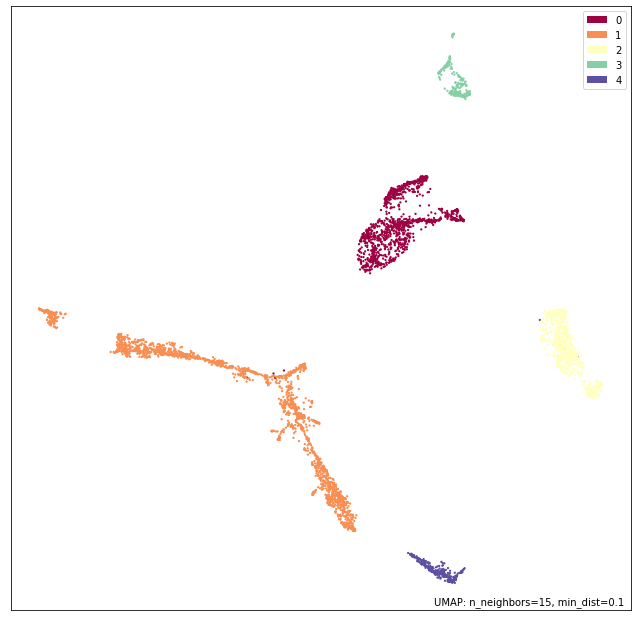

In [ ]:
#How to use UMAP plotting feature:
#make sure you install umap.plot by : pip install umap-learn[plot]

import umap.plot

mapper = umap.UMAP().fit(dft)
umap.plot.points(mapper, labels=dbscan_m.labels_)